# Time series decomposition of the data cube

In [1]:
using CABLAB

INFO: Precompiling module CABLAB.


In [2]:
c             = Cube("/Net/Groups/BGI/scratch/fgans/cubecopy/datacube/")
vars          = ["t2m","SoilMoisture","Emission"];
cdata         = getCubeData(c,latitude=(30,65), longitude=(-10,40),variable=vars); 

We want to decompose the time series into a signals of Trend, Seasonal cycle, low-frequency variations and high-frequency variantions. Here we use a Fourier-based approach by calling **filterTSFFT**. Before doing so, we need to do some gapFilling

Comments: 
1. cube address correct ? Uses old names 
2. using CABLAB produces warnings 


In [3]:
cube_filled=mapCube(gapFillMSC,cdata);

In [4]:
xout=mapCube(filterTSFFT,cube_filled);

And we can plot the resulting decomposed time series

In [5]:
plotXY(xout,xaxis="timeax",group="timescale",lon=35,lat=50.5,var=1)

LoadError: LoadError: No axis found matching string timeax
while loading In[5], in expression starting on line 1

**Comments: Error: no xaxis called "timeax"**

In [6]:
variance=mapCube(timeVariance,xout);

LoadError: LoadError: UndefVarError: timeVariance not defined
while loading In[6], in expression starting on line 1

**Comments: Error: No function timeVariance defined**

Let's look at a map of the variability in the Trend signal to see where trends in air temperature are strongest.

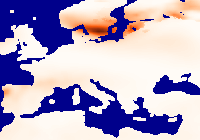

In [18]:
plotMAP(variance,timescale=1,var=1)

One can also check which areas have the strongest variance in the seasonal cycle

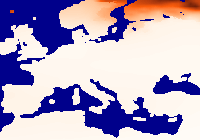

In [19]:
plotMAP(variance,timescale=3,var=1)